### Calculate the sinkhorn distance between samples for a fixed sample size from a d-dimensional gaussian distribution.

In [1]:
# add modules to Python's search path
import os
import seaborn as sns
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt

#import  torch
#from geomloss import SamplesLoss
import tensorflow as tf
from modules import wasserstein as tfw
import tensorflow_probability as tfp
tfd = tfp.distributions
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')

In [8]:
print([cls.__name__ for cls in tfp.distributions.Distribution.__subclasses__()])

['Autoregressive', 'BatchReshape', 'Bates', 'Bernoulli', 'Gamma', 'Beta', 'Binomial', 'BetaBinomial', 'JointDistribution', 'JointDistribution', '_Cast', 'Blockwise', 'Categorical', 'Cauchy', 'Chi2', 'TransformedDistribution', 'LKJ', 'CholeskyLKJ', 'ContinuousBernoulli', '_BaseDeterministic', '_BaseDeterministic', 'Dirichlet', 'Multinomial', 'DirichletMultinomial', 'DoublesidedMaxwell', 'Empirical', 'Normal', 'ExponentiallyModifiedGaussian', 'ExpGamma', 'FiniteDiscrete', 'GammaGamma', 'Sample', 'GaussianProcess', 'GeneralizedNormal', 'GeneralizedPareto', 'Geometric', 'Uniform', 'HalfCauchy', 'HalfNormal', 'StudentT', 'HalfStudentT', 'HiddenMarkovModel', 'Horseshoe', 'Independent', 'InverseGamma', 'InverseGaussian', 'Laplace', 'LinearGaussianStateSpaceModel', 'Logistic', 'Mixture', 'MixtureSameFamily', 'MultivariateStudentTLinearOperator', 'NegativeBinomial', 'OneHotCategorical', 'OrderedLogistic', 'Pareto', 'PERT', 'QuantizedDistribution', 'Poisson', '_TensorCoercible', 'PixelCNN', 'Pla

# Generate ensembles and calculate distances:

In [46]:
dist_1=tfd.MultivariateNormalFullCovariance(loc = [0., 5.], covariance_matrix = [[1., .7], [.7, 1.]])
dist_2=tfd.MultivariateNormalFullCovariance(loc = [0., 5.], covariance_matrix = [[1., .0], [.0, 1.]])

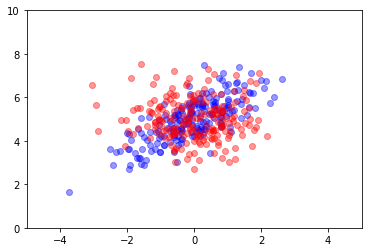

In [48]:
data1= dist_1.sample(200)
data2= dist_2.sample(200)
plt.scatter(data1[:, 0], data1[:, 1], color='b', alpha=0.4,label='sample1')
plt.scatter(data2[:, 0], data2[:, 1], color='r', alpha=0.4,label='sample2')
plt.axis([-5, 5, 0, 10])
plt.show()

In [49]:
distance = tfw.sinkhorn_loss(data1, data2, epsilon=0.01, num_iter=2000, p=2)


<tf.Tensor: shape=(), dtype=float32, numpy=0.534149>

Text(0, 0.5, 'Sinkhor n-distance $\\to$')

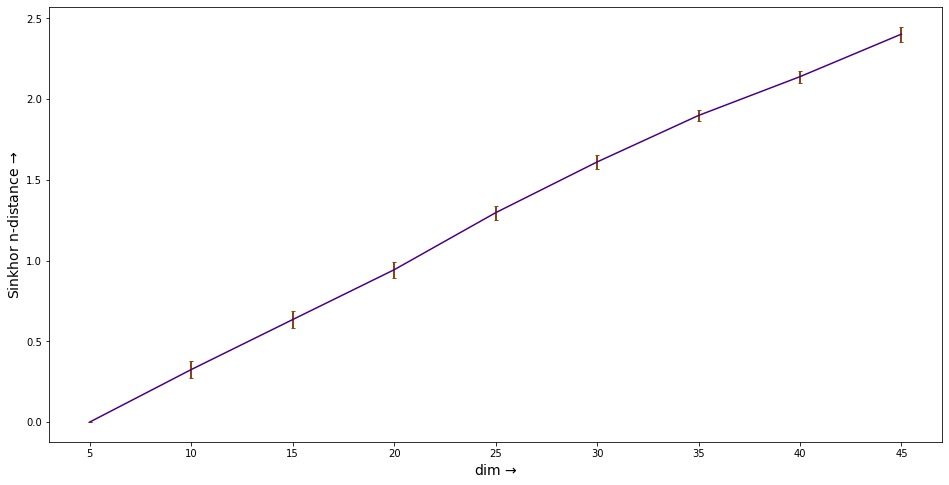

In [77]:
plt.figure(figsize=(16,8))
plt.errorbar(dims,np.mean(distances,axis=1), yerr=2.262*np.std(distances,axis=1)/np.sqrt(20), fmt='-',alpha=1, color='indigo',
                    ecolor='saddlebrown', elinewidth=2, capsize=2)
plt.xlabel(r'dim $\to$',fontsize=14)
plt.ylabel(r'Sinkhor n-distance $\to$',fontsize=14)

No handles with labels found to put in legend.


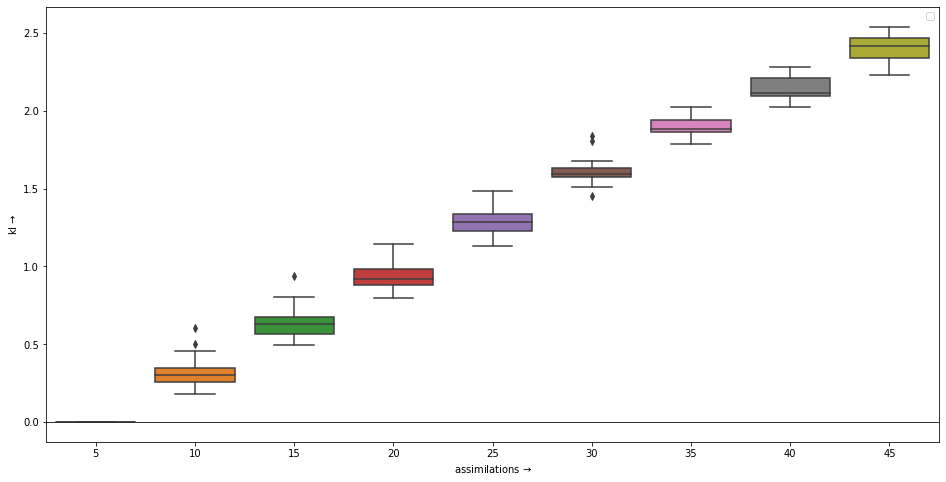

In [83]:
plt.figure(figsize=(16,8))
x_for_boxplot = np.repeat(dims, 20)
y_for_boxplot = distances.flatten('C')

ax = sns.boxplot(x=x_for_boxplot, y=y_for_boxplot)
plt.axhline(0,lw=0.8,c='black')
plt.xlabel(r'assimilations $\to$')
plt.ylabel(r'kl $\to$')
plt.legend()

In [138]:
dat1=np.load('distances_size=100_realizations=40_dim=5_to_50.npy')
dat2=np.load('distances_size=50_realizations=40_dim=5_to_50.npy')
dims=np.arange(5,55,5)

No handles with labels found to put in legend.


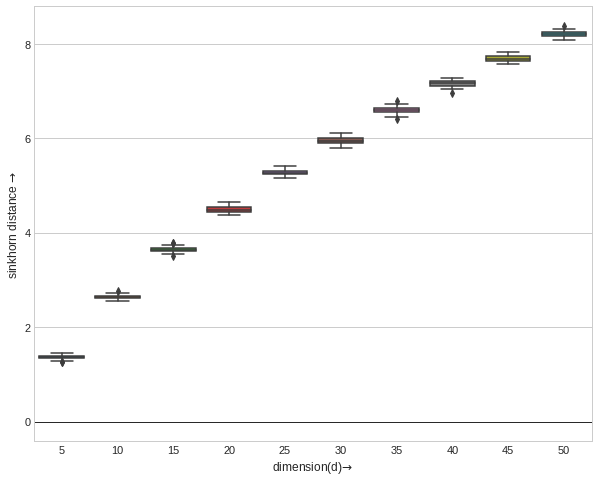

In [136]:
plt.figure(figsize=(10,8))
x_for_boxplot = np.repeat(dims, 40)
y_for_boxplot = dat1.flatten('C')

ax = sns.boxplot(x=x_for_boxplot, y=y_for_boxplot)
plt.axhline(0,lw=0.8,c='black')
plt.ylabel(r'sinkhorn distance $\to$')
plt.xlabel(r'dimension(d)$\to$')
plt.legend()

Text(0, 0.5, 'Sinkhor n-distance $\\to$')

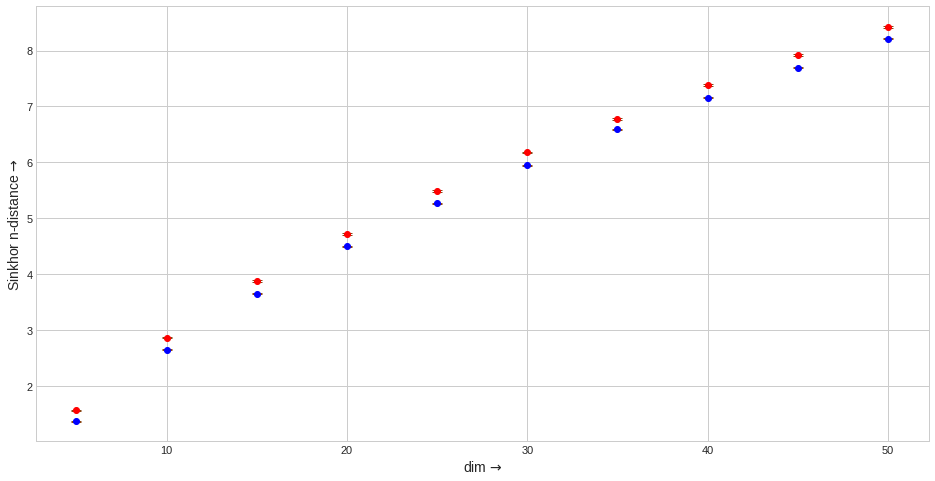

In [139]:
plt.figure(figsize=(16,8))
plt.errorbar(dims,np.mean(dat1,axis=1), yerr=np.std(dat1,axis=1)/np.sqrt(40), fmt='o',alpha=1, color='b',
                    ecolor='saddlebrown', elinewidth=2, capsize=5)
plt.errorbar(dims,np.mean(dat2,axis=1), yerr=np.std(dat2,axis=1)/np.sqrt(40), fmt='o',alpha=1, color='red',
                    ecolor='saddlebrown', elinewidth=2, capsize=5)
plt.xlabel(r'dim $\to$',fontsize=14)
plt.ylabel(r'Sinkhor n-distance $\to$',fontsize=14)

In [137]:
np.std(dat1,axis=1)/np.sqrt(40)

array([0.0072043 , 0.00651954, 0.00942812, 0.01092596, 0.0091372 ,
       0.01161838, 0.01166481, 0.01149823, 0.0101136 , 0.01000062])

In [158]:
import scipy.stats as st

# Ensemble size=[50,100,200,400,800,1600]
# Realizations=50
# Dimensions=[10,20,....100]

In [141]:
dat3=np.load('distances_sizes=50_to_1600_realizations=50_dim=10_to_100.npy')
dat3.shape

(6, 10, 50)

In [ ]:
st.t.interval(alpha=0.95, df=len(data3)-1, loc=np.mean(data), scale=st.sem(data)) 

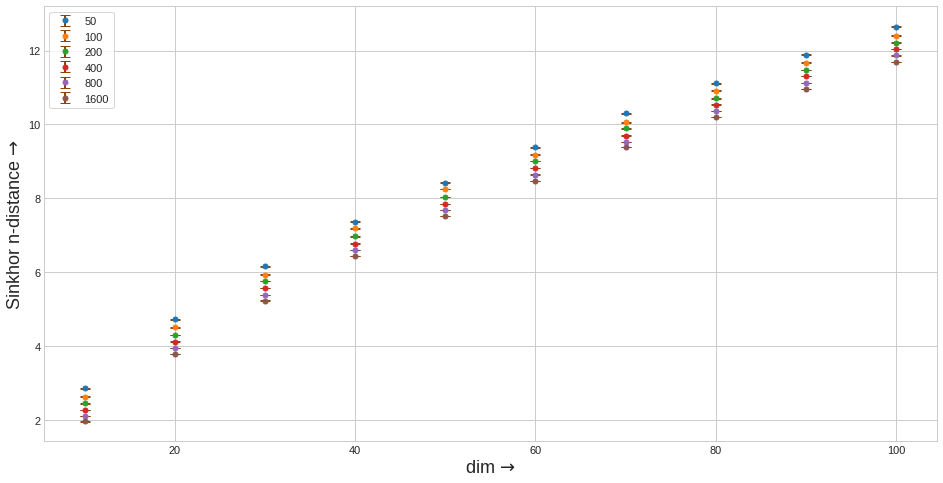

In [167]:
ens=np.array([50,100,200,400,800,1600])
dims=np.arange(10,110,10)
plt.figure(figsize=(16,8))
for i in range(6):
    plt.errorbar(dims,np.mean(dat3[i],axis=1), yerr=np.std(dat3[i],axis=1)/np.sqrt(50), fmt='o',alpha=1,markersize=5,
                    ecolor='saddlebrown', elinewidth=2, capsize=5,label='{}'.format(ens[i]))
plt.xlabel(r'dim $\to$',fontsize=18)
plt.ylabel(r'Sinkhor n-distance $\to$',fontsize=18)
plt.legend(frameon='true')

In [3]:
dat4=np.load('distances_sizes=50_to_1600_realizations=50_dim=5_to_45_div_tf.npy')
dat4.shape

(6, 9, 50)

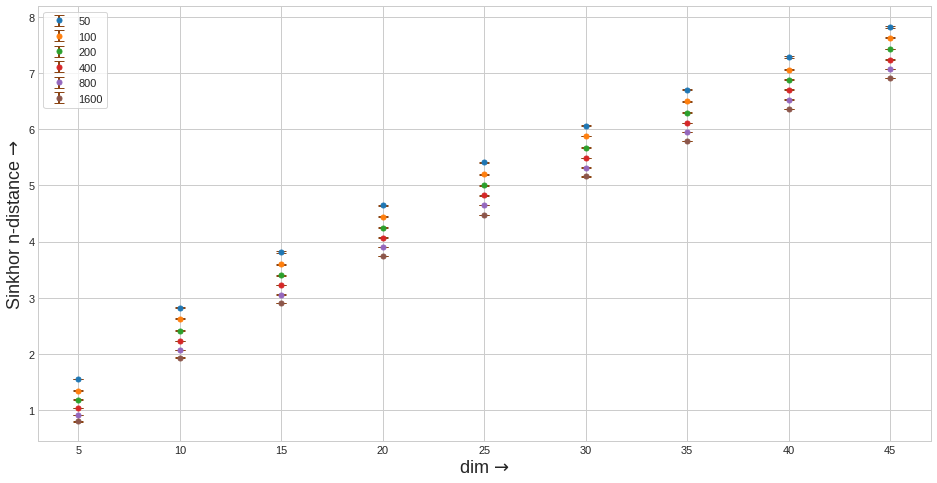

In [5]:
ens=np.array([50,100,200,400,800,1600])
dims=np.arange(5,50,5)
plt.figure(figsize=(16,8))
for i in range(6):
    plt.errorbar(dims,np.mean(dat4[i],axis=1), yerr=np.std(dat4[i],axis=1)/np.sqrt(50), fmt='o',alpha=1,markersize=5,
                    ecolor='saddlebrown', elinewidth=2, capsize=5,label='{}'.format(ens[i]))
plt.xlabel(r'dim $\to$',fontsize=18)
plt.ylabel(r'Sinkhor n-distance $\to$',fontsize=18)
plt.legend(frameon='true')
# plot the true distance

In [148]:
ens=np.array([50,100,200,400,800,1600])
plt.figure(figsize=(16,8))
x_for_boxplot = np.repeat(dims, 50)
n=4
y_for_boxplot = dat3[3].flatten('C')
ax = sns.boxplot(x_for_boxplot, y_for_boxplot)
plt.axhline(0,lw=0.8,c='black')
plt.xlabel(r'assimilations $\to$')
plt.ylabel(r'kl $\to$')
plt.legend()

In [3]:
# Wasserstein_2 formula
def w2_formula(ensemble_1, ensemble_2, tf=True):
    if tf:
        ensemble_1 = ensemble_1.numpy()
        ensemble_2 = ensemble_2.numpy()
    m1 = np.mean(ensemble_1, axis=0)
    m2 = np.mean(ensemble_2, axis=0)
    C1 = np.cov(ensemble_1.T)
    C2 = np.cov(ensemble_2.T)
    r_C2 = sp.linalg.sqrtm(C2)
    term_1 = np.linalg.norm(m1 - m2, ord=2)
    term_2 = np.trace( C1 + C2 - 2.0 * sp.linalg.sqrtm(np.linalg.multi_dot([r_C2, C1, r_C2])) )
    return np.sqrt(term_1**2 + term_2**2)

def w2_closed_form(m1,m2,C1,C2):
    r_C2=np.linalg.sqrtm(C2)
    term_1 = np.linalg.norm(m1 - m2, ord=2)
    term_2 = np.trace( C1 + C2 - 2.0 * sp.linalg.sqrtm(np.linalg.multi_dot([r_C2, C1, r_C2])) )
    return np.sqrt(term_1**2 + term_2**2)

In [ ]:
dims=np.arange(10,110,10)
for i in range(len(dims)):
    pdf=tfd.MultivariateNormalTriL(loc=tf.zeros(dims[i]), scale_tril=tf.linalg.cholesky(tf.eye(dims[i])))
    dist_f[i]=w2_closed_form()